In [1]:
import random
import copy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


# 1) Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

### Algoritmo Gale-Shapley

In [19]:
def wPrefersM1OverM(prefer, w, m, m1, n): 
    N = n  
    for i in range(N): 
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False
def stableMarriage(prefer, n): 
    N = n
    wPartner = [-1 for i in range(N)] 
    mFree = [False for i in range(N)] 
    freeCount = N 
    count = 0
    while (freeCount > 0): 
        count += 1 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1, n) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i]) 

    return count

### Algoritmo Irving

In [20]:
def getKey(lista, llave):
    for key, val in lista.items():
        if val == llave:
            return key
    return 0

def ciclo(tabla):
    tablaI = tabla[0]
    tablaD = tabla[1]
    if len(tablaI) > len(set(tablaI)):
        return True
    else:
        return False

def noEstable(prefer):
    for i in prefer:
        if len(prefer[i]) == 0:
            return True
    return False

def esEstable(prefer):
  for i in prefer:
    if len(prefer[i]) != 1:
      return False
  return True

def quitarCiclo(prefer, tabla):
  npreferences = prefer
  for i in range(len(tabla[0])-1):
    npreferences[tabla[1][i]].remove(tabla[0][i+1])
    npreferences[tabla[0][i+1]].remove(tabla[1][i])
  return npreferences

def paso1(prefer):
  espera = []
  propuestas={}
  npropuestas={}
  pasos=0
  for i in prefer:
    espera.append(i)
    propuestas[i] = None
    npropuestas[i] = 0
  npreferences = copy.deepcopy(prefer)
  while not len(espera)==0:
    i=espera[0]
    npropuestas[i]+=1
    pasos+=1
    if npropuestas[i]> len(propuestas):
      print("No existe parejas estables.")
      return (False,False)
    for j in prefer[i]:
      if propuestas[j]==None:
        del espera[0]
        propuestas[j]=i
        break
      elif propuestas[j] != i:
        actual = prefer[j].index(i)
        otro = prefer[j].index(propuestas[j])
        if actual < otro:
          del espera[0]
          espera.insert(0, propuestas[j])
          npreferences[propuestas[j]].remove(j)
          npreferences[j].remove(propuestas[j])
          propuestas[j] = i
          break
        else:
          npreferences[i].remove(j)
          npreferences[j].remove(i)
    prefer = copy.deepcopy(npreferences)
  return (propuestas,prefer,pasos)

def paso2(propuestas,prefer,pasos):
  npreferences=copy.deepcopy(prefer)
  for k in prefer:
    indexpropuestas=npreferences[k].index(propuestas[k])
    npreferences[k]= npreferences[k][:indexpropuestas+1]
    #pasos+=1
    for j in prefer:
      key= getKey(propuestas,k)
      if j != k and j != propuestas[k] and j != key:
        try:
          npreferences[j].remove(k)
        except ValueError:
          pass
  return (npreferences,pasos)


def paso3(prefer,pasos):
  si=True
  while True:
    tabla=([],[])
    if noEstable(prefer):
      print("No existe parejas estables.")
      return False
    for i in prefer:
      if len(prefer[i]) >= 2 and si == True:
        match1 = i
        tabla[0].append(match1)
        match2 = prefer[i][1]
        tabla[1].append(match2)
        si=False
        pasos+=1
      elif si==False:
        if (ciclo(tabla)):
          prefer=quitarCiclo(prefer,tabla)
          si = True
          pasos+=1
          break
        match1 = prefer[match2][-1]
        tabla[0].append(match1)
        match2 = prefer[match1][1]
        tabla[1].append(match2)
        pasos+=1
    if esEstable(prefer):
      return (prefer,pasos)

  return False
def irving(prefer):
  a=paso1(prefer)
  propuestas=a[0]
  if propuestas==False:
    return False
  prefer1=a[1]
  pasos=a[2]
  prefer2=paso2(propuestas,prefer1,pasos)[0]
  pasos=paso2(propuestas,prefer1,pasos)[1]
  if prefer2==False:
    return False
  prefer3=paso3(prefer2,pasos)
  matches=prefer3[0]
  pasos=prefer3[1]
  for i in matches:
    a=i
    for j in matches[i]:
      print(a," es pareja de ", j)
  print("Numero de operaciones = ",pasos)


## Mejores y peores casos Gale-Shapley 

Peor caso para n = 4 y n = 40

In [21]:
%%time 
#para n=40
n=40
prefer2 = []
preferW = [i+n for i in range(n)]
prefer2.append(preferW[:])
for i in range(n-1):
  a = preferW[1:n-1]
  b = preferW[0]
  preferW[n-2] = b
  preferW[0:n-2] = a[:]
  prefer2.append(preferW[:])
preferM = [i for i in range(n)]
for i in range(n):
  a = preferM.pop(0)
  preferM.append(a)
  prefer2.append(preferM[:])
print("Numero de iteraciones:")
print(stableMarriage(prefer2,n))

Numero de iteraciones:
Woman   Man
40 	 1
41 	 2
42 	 3
43 	 4
44 	 5
45 	 6
46 	 7
47 	 8
48 	 9
49 	 10
50 	 11
51 	 12
52 	 13
53 	 14
54 	 15
55 	 16
56 	 17
57 	 18
58 	 19
59 	 20
60 	 21
61 	 22
62 	 23
63 	 24
64 	 25
65 	 26
66 	 27
67 	 28
68 	 29
69 	 30
70 	 31
71 	 32
72 	 33
73 	 34
74 	 35
75 	 36
76 	 37
77 	 38
78 	 39
79 	 0
1561
CPU times: user 73.7 ms, sys: 4.12 ms, total: 77.8 ms
Wall time: 75.5 ms


In [22]:
%%time 
#para n=4
n=4
prefer2 = []
preferW = [i+n for i in range(n)]
prefer2.append(preferW[:])
for i in range(n-1):
  a = preferW[1:n-1]
  b = preferW[0]
  preferW[n-2] = b
  preferW[0:n-2] = a[:]
  prefer2.append(preferW[:])
preferM = [i for i in range(n)]
for i in range(n):
  a = preferM.pop(0)
  preferM.append(a)
  prefer2.append(preferM[:])
print("Numero de iteraciones:")
print(stableMarriage(prefer2,n))

Numero de iteraciones:
Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0
13
CPU times: user 890 µs, sys: 111 µs, total: 1 ms
Wall time: 811 µs


Mejor caso para n = 4 y n = 40

In [23]:
%%time 
#para n=40
preferM = []
preferW = []
prefer2 = []

n=40

# Fill man list
preferM = [i+n for i in range(n)]
for i in range(n):
  ax = preferM.pop(0)
  preferM.append(ax)
  prefer2.append(preferM[:])

# Fill womman list
preferW = [i for i in range(n)]
for i in range(n):
  ax = preferW.pop(0)
  preferW.append(ax)
  prefer2.append(preferW[:])

print(stableMarriage(prefer2,n))

Woman   Man
40 	 39
41 	 0
42 	 1
43 	 2
44 	 3
45 	 4
46 	 5
47 	 6
48 	 7
49 	 8
50 	 9
51 	 10
52 	 11
53 	 12
54 	 13
55 	 14
56 	 15
57 	 16
58 	 17
59 	 18
60 	 19
61 	 20
62 	 21
63 	 22
64 	 23
65 	 24
66 	 25
67 	 26
68 	 27
69 	 28
70 	 29
71 	 30
72 	 31
73 	 32
74 	 33
75 	 34
76 	 35
77 	 36
78 	 37
79 	 38
40
CPU times: user 9.8 ms, sys: 218 µs, total: 10 ms
Wall time: 8.87 ms


In [24]:
%%time 
#para n=4
preferM = []
preferW = []
prefer2 = []

n=4
preferM = [i+n for i in range(n)]
for i in range(n):
  ax = preferM.pop(0)
  preferM.append(ax)
  prefer2.append(preferM[:])

preferW = [i for i in range(n)]
for i in range(n):
  ax = preferW.pop(0)
  preferW.append(ax)
  prefer2.append(preferW[:])

print(stableMarriage(prefer2,n))

Woman   Man
4 	 3
5 	 0
6 	 1
7 	 2
4
CPU times: user 0 ns, sys: 691 µs, total: 691 µs
Wall time: 523 µs


## Peores y mejores caso Irving

Peor caso para n = 4 y n = 40

In [25]:
%%time 
# Para n=4
prefern4={"A": ["B", "C", "D"],
          "B": ["C", "D", "A"],
          "C": ["D", "A", "B"],
          "D": ["A", "B", "C"]}
irving(prefern4)


A  es pareja de  D
B  es pareja de  C
C  es pareja de  B
D  es pareja de  A
Numero de operaciones =  8
CPU times: user 2.48 ms, sys: 963 µs, total: 3.44 ms
Wall time: 3.01 ms


In [26]:
%%time 
# Para n=40
def worst(n):
  prefer={}
  for k in range(n):
      ni=n
      list=[]
      for i in range(k+1,n):
        list.append(i)
      for j in range (k):
        list.append(j)
      prefer[k]=list
  return prefer
a=worst(40)
irving(a)

0  es pareja de  39
1  es pareja de  2
2  es pareja de  1
3  es pareja de  4
4  es pareja de  3
5  es pareja de  6
6  es pareja de  5
7  es pareja de  8
8  es pareja de  7
9  es pareja de  10
10  es pareja de  9
11  es pareja de  12
12  es pareja de  11
13  es pareja de  14
14  es pareja de  13
15  es pareja de  16
16  es pareja de  15
17  es pareja de  18
18  es pareja de  17
19  es pareja de  20
20  es pareja de  19
21  es pareja de  22
22  es pareja de  21
23  es pareja de  24
24  es pareja de  23
25  es pareja de  26
26  es pareja de  25
27  es pareja de  28
28  es pareja de  27
29  es pareja de  30
30  es pareja de  29
31  es pareja de  32
32  es pareja de  31
33  es pareja de  34
34  es pareja de  33
35  es pareja de  36
36  es pareja de  35
37  es pareja de  38
38  es pareja de  37
39  es pareja de  0
Numero de operaciones =  62
CPU times: user 58.5 ms, sys: 1.95 ms, total: 60.5 ms
Wall time: 58.1 ms


Mejor caso para n = 4 y n = 40

In [27]:
%%time
#para n=4 
prefern4={"A": ["B", "C", "D"],
          "B": ["A", "C", "D"],
          "C": ["C", "A", "B"],
          "D": ["D", "A", "B"]}
irving(prefern4)


A  es pareja de  B
B  es pareja de  A
C  es pareja de  C
D  es pareja de  D
Numero de operaciones =  4
CPU times: user 991 µs, sys: 0 ns, total: 991 µs
Wall time: 734 µs


In [28]:
%%time 
#para n=40
def mejores40(n):
  prefer={}
  for k in range(n):
      list=[]
      list.append(n-k-1)
      while not len(list)==n-1:
        r=random.randint(0,n-1)
        if r not in list and r!=k:
          list.append(r)
      prefer[k]=list
  return prefer
irving(mejores40(40))

0  es pareja de  39
1  es pareja de  38
2  es pareja de  37
3  es pareja de  36
4  es pareja de  35
5  es pareja de  34
6  es pareja de  33
7  es pareja de  32
8  es pareja de  31
9  es pareja de  30
10  es pareja de  29
11  es pareja de  28
12  es pareja de  27
13  es pareja de  26
14  es pareja de  25
15  es pareja de  24
16  es pareja de  23
17  es pareja de  22
18  es pareja de  21
19  es pareja de  20
20  es pareja de  19
21  es pareja de  18
22  es pareja de  17
23  es pareja de  16
24  es pareja de  15
25  es pareja de  14
26  es pareja de  13
27  es pareja de  12
28  es pareja de  11
29  es pareja de  10
30  es pareja de  9
31  es pareja de  8
32  es pareja de  7
33  es pareja de  6
34  es pareja de  5
35  es pareja de  4
36  es pareja de  3
37  es pareja de  2
38  es pareja de  1
39  es pareja de  0
Numero de operaciones =  40
CPU times: user 70.8 ms, sys: 2.04 ms, total: 72.9 ms
Wall time: 71.5 ms


# 2) Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

### Gale-Shapley que solo retorna iteraciones

In [29]:
def stableMarriage(prefer, n): 
    N = n
    wPartner = [-1 for i in range(N)] 
    mFree = [False for i in range(N)] 
    freeCount = N 
    count = 0
    while (freeCount > 0): 
        count += 1 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1, n) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    return count

### Generacion de matrices de preferencia

In [30]:
def preferMarriages(n):
  prefer=[]
  nn=2*n
  for j in range(n):
    list=[]
    while not len(list)==n:
      r=random.randint(0,n-1)
      if r not in list: list.append(r)
    prefer.insert(j,list)
  for k in range(n):
    list=[]
    while not len(list)==n:
      r=random.randint(n+1,nn)
      if r not in list: list.append(r)
    prefer.insert(n+k,list)
  return prefer


### Para n=40

In [31]:
def promedio(lst): 
    return sum(lst) / len(lst) 

# 100 times for N = 40
lot = []
for i in range(100):
  lot.append(stableMarriage(preferMarriages(40),40))

aux = lot
res = []
Ma = 0
Mi = 100
#Minimun, Maximun and Average
for i in aux:
  x = aux.pop(0)
  if (x > Ma):
    Ma = x
  if (x < Mi):
    Mi = x
print("Maximo: ", Ma, " Minimo: ", Mi, " Promedio: ", promedio(lot))

Maximo:  93  Minimo:  59  Promedio:  78.54


Text(0, 0.5, 'Times')

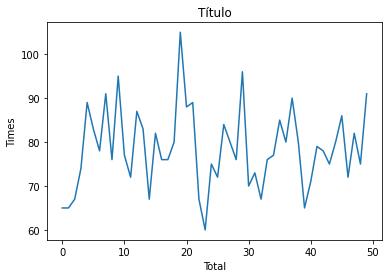

In [32]:
plt.plot(lot)   # Dibuja el gráfico
plt.title("Título")   # Establece el título del gráfico
plt.xlabel("Total")   # Establece el título del eje x
plt.ylabel("Times")   # Establece el título del eje y

### Para n=4

In [33]:
# 100 times for N = 4
def promedio(lst): 
    return sum(lst) / len(lst) 
lot = []
for i in range(100):
  lot.append(stableMarriage(preferMarriages(4),4))

aux = lot
res = []
Ma = 0
Mi = 100
#Minimun, Maximun and Average
for i in aux:
  x = aux.pop(0)
  if (x > Ma):
    Ma = x
  if (x < Mi):
    Mi = x
print("Maximo: ", Ma, " Minimo: ", Mi, " Promedio: ", promedio(lot))

Maximo:  8  Minimo:  4  Promedio:  5.08


Text(0, 0.5, 'Times')

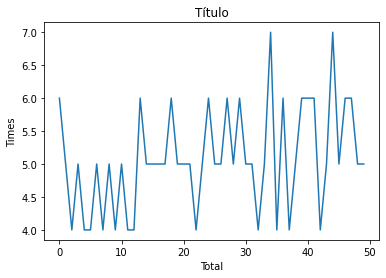

In [34]:
plt.plot(lot)   # Dibuja el gráfico
plt.title("Título")   # Establece el título del gráfico
plt.xlabel("Total")   # Establece el título del eje x
plt.ylabel("Times")   # Establece el título del eje y